In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

import time
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, confusion_matrix, roc_auc_score, recall_score, precision_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud, STOPWORDS
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from tqdm import tqdm_notebook as tqdm
from tqdm import trange
from sklearn.preprocessing import Normalizer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\balte\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [136]:
drugs= pd.read_csv(r"C:\Users\balte\Desktop\project 2\drugsCom_raw.tsv",  index_col=False, sep='\t')
drugs.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [137]:
data=drugs
data.head(1)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27


In [3]:
drugs.drop(['Unnamed: 0'], axis=1, inplace=True)# drop Unnamed: 0 column
drugs.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [4]:
drugs.shape

(161297, 6)

In [5]:

drugs.columns

Index(['drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'], dtype='object')

In [6]:
# describing the data

drugs.describe()

,rating,usefulCount
count,161297.000000,161297.000000
mean,6.994377,28.004755
std,3.272329,36.403742
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


In [7]:
# taking out information from the data

drugs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   drugName     161297 non-null  object 
 1   condition    160398 non-null  object 
 2   review       161297 non-null  object 
 3   rating       161297 non-null  float64
 4   date         161297 non-null  object 
 5   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 7.4+ MB


In [8]:
# checking if the data contains any NULL values

drugs.isnull().any()

drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [9]:
drugs['condition'].isnull().sum(axis = 0)

899

In [10]:
# Drop the null values
drugs.dropna(inplace=True, axis=0)

In [11]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160398 entries, 0 to 161296
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   drugName     160398 non-null  object 
 1   condition    160398 non-null  object 
 2   review       160398 non-null  object 
 3   rating       160398 non-null  float64
 4   date         160398 non-null  object 
 5   usefulCount  160398 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 8.6+ MB


In [12]:
drugs.loc[drugs['rating'] == 1, :]['drugName'].value_counts().head(10)

Miconazole                            569
Ethinyl estradiol / norethindrone     567
Etonogestrel                          526
Levonorgestrel                        379
Nexplanon                             371
Ethinyl estradiol / norgestimate      341
Medroxyprogesterone                   341
Depo-Provera                          326
Tioconazole                           288
Ethinyl estradiol / levonorgestrel    284
Name: drugName, dtype: int64

In [13]:
drugs.at[drugs['usefulCount'].idxmin(), 'drugName']

'Trimethoprim'

In [14]:
drugs.shape

(160398, 6)

**EDA**

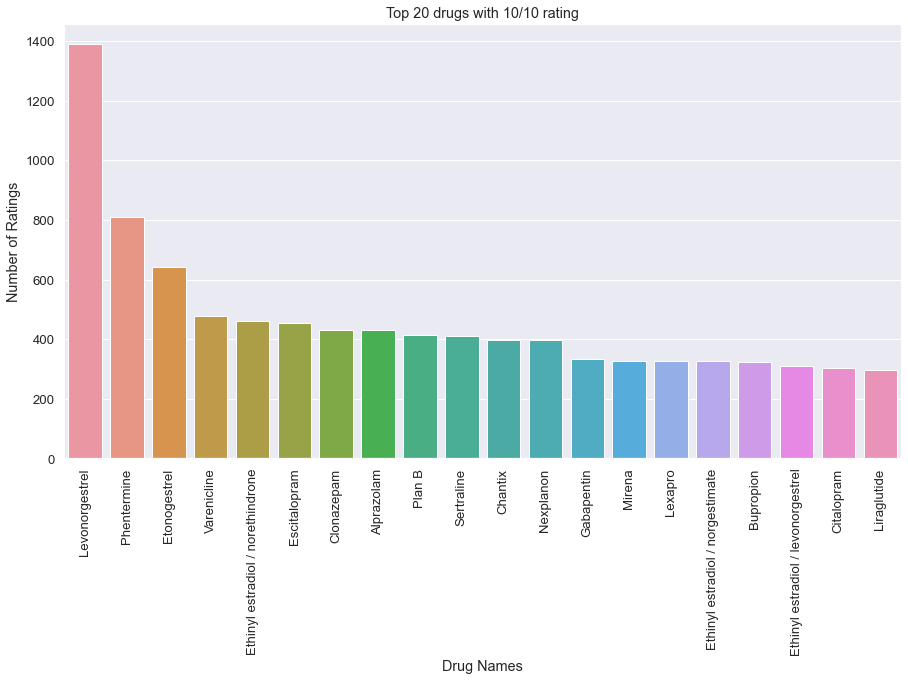

In [15]:
# This barplot shows the top 20 drugs with the 10/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(drugs.loc[drugs.rating == 10, "drugName"].value_counts())
drugName = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugName[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

Top 20 drugs with 10 rating.There is levonorgestrel drug with high count which almost near to 1400.

Text(0.5, 0, 'Rating')

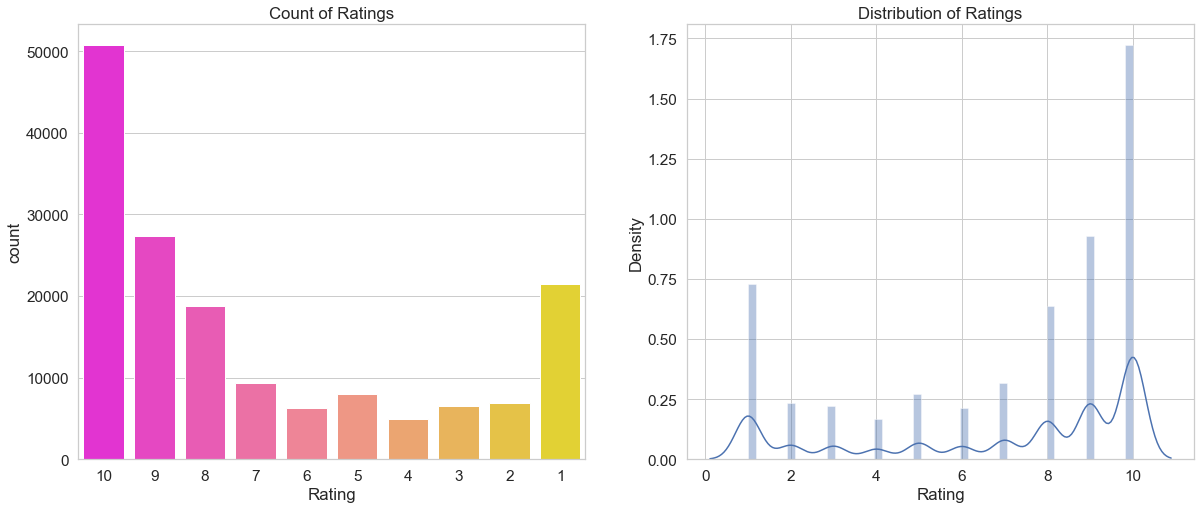

In [16]:
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(drugs['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(drugs['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

Out of 10 rating , people gives top rating is 10 which is greater than 50000

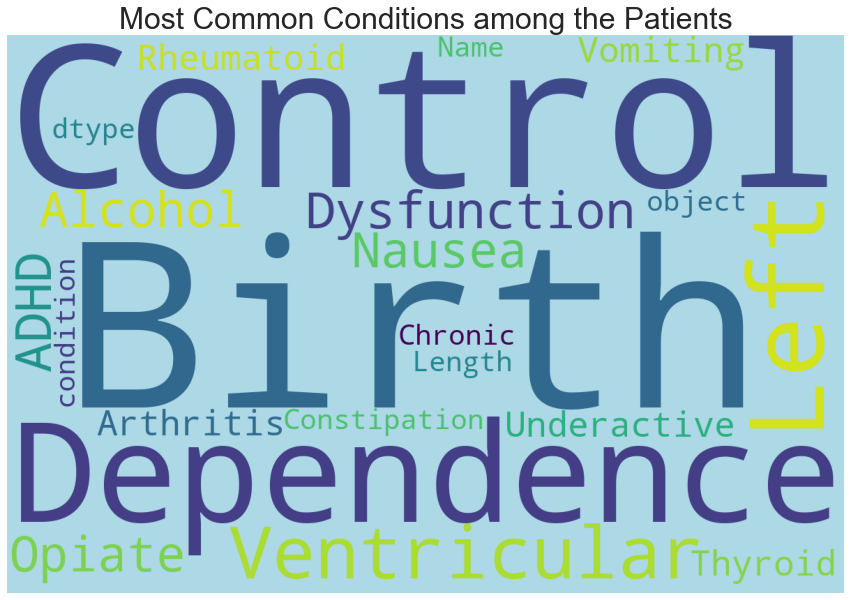

In [17]:
# let's see the words cloud for the 'Most Common Conditions among the Patients'
# most common condition

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, max_words = 100, width = 1200, height = 800).generate(str(drugs['condition']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Common Conditions among the Patients', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

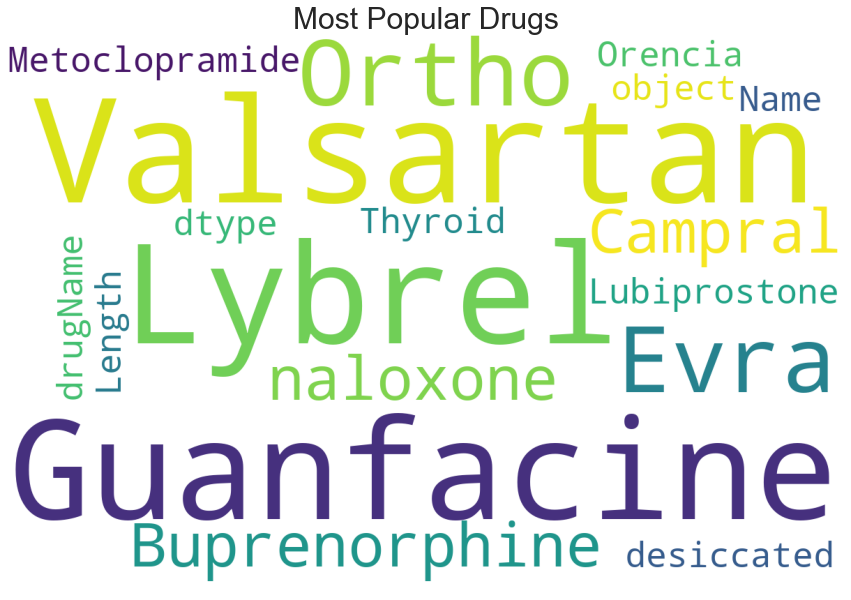

In [18]:
# let's see the words cloud for the 'most popular drugs'

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width = 1200, height = 800).generate(str(drugs['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Popular Drugs', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

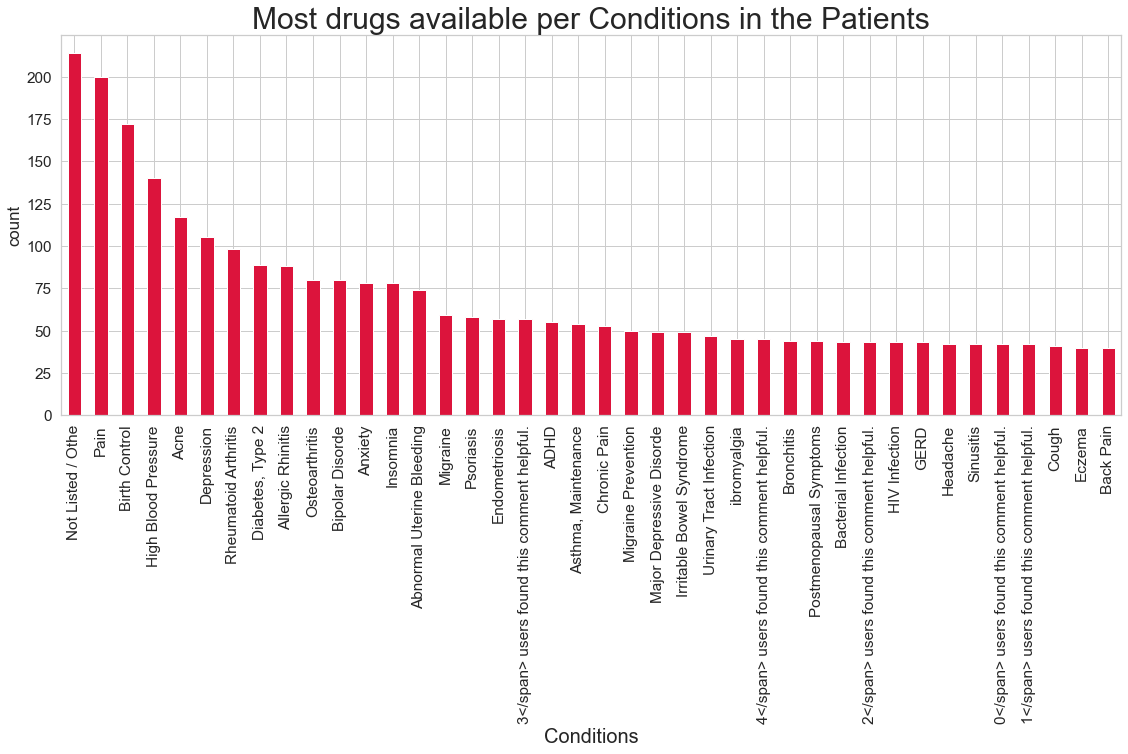

In [19]:
# checking the most popular drugs per conditions

drugs.groupby(['condition'])['drugName'].nunique().sort_values(ascending = False).head(40).plot.bar(figsize = (19, 7), color = 'crimson')
plt.title('Most drugs available per Conditions in the Patients', fontsize = 30)
plt.xlabel('Conditions', fontsize = 20)
plt.ylabel('count')
plt.show()
     


There are most popular drugs per condition is not listed but other than is pain and birth control.

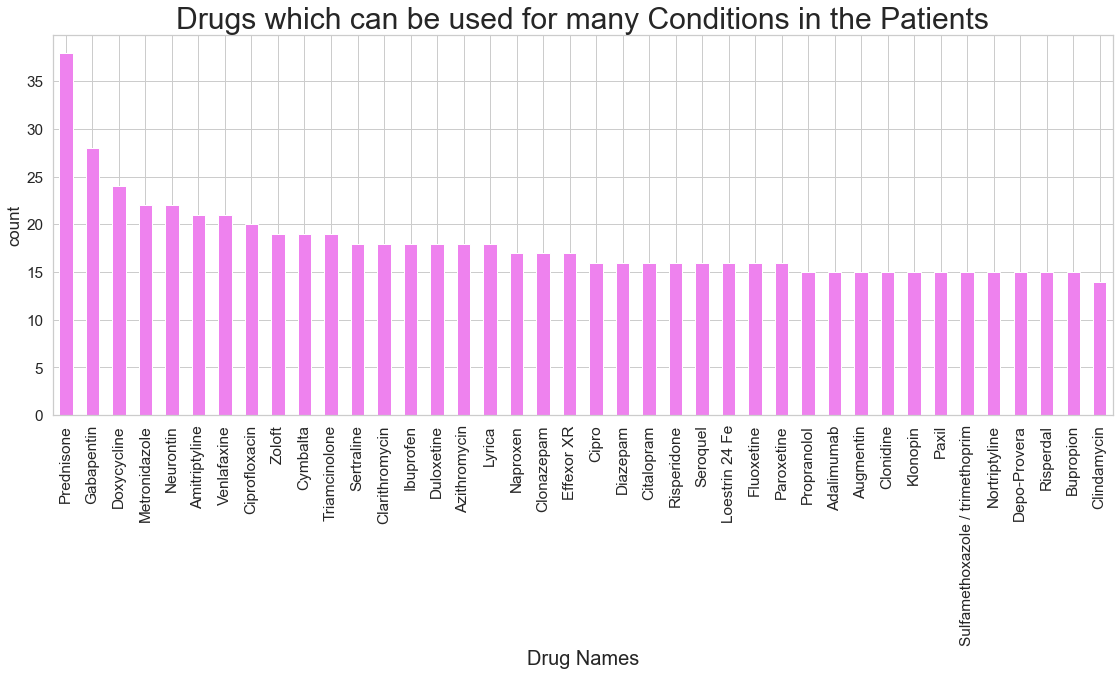

In [20]:
# checking the most popular drugs per conditions

drugs.groupby(['drugName'])['condition'].nunique().sort_values(ascending = False).head(40).plot.bar(figsize = (19, 7), color = 'violet')
plt.title('Drugs which can be used for many Conditions in the Patients', fontsize = 30)
plt.xlabel('Drug Names', fontsize = 20)
plt.ylabel('count')
plt.show()

Drugs which can br used for many conditions in the patients is prednisone with count 36


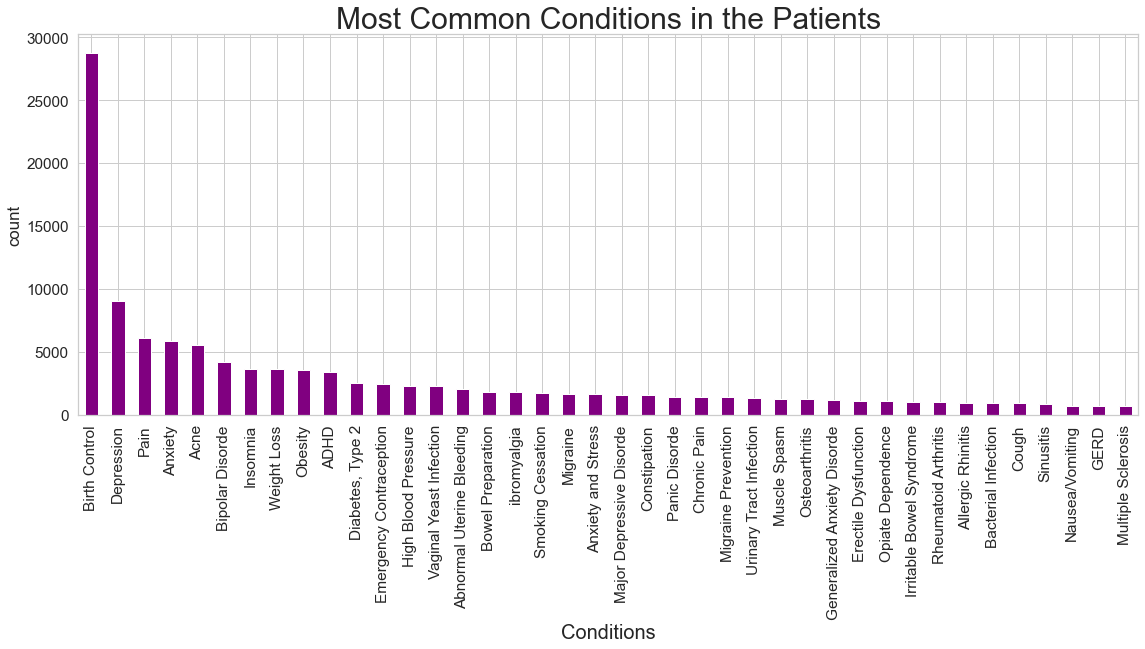

In [21]:
# checking the different types of conditions patients


drugs['condition'].value_counts().head(40).plot.bar(figsize = (19, 7), color = 'purple')
plt.title('Most Common Conditions in the Patients', fontsize = 30)
plt.xlabel('Conditions', fontsize = 20)
plt.ylabel('count')
plt.show()

most common condition in the patients is brith control with count 28000. Another is depression with count 9000.

In [22]:
# let's read some reviews

drugs['review'][2]
     

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

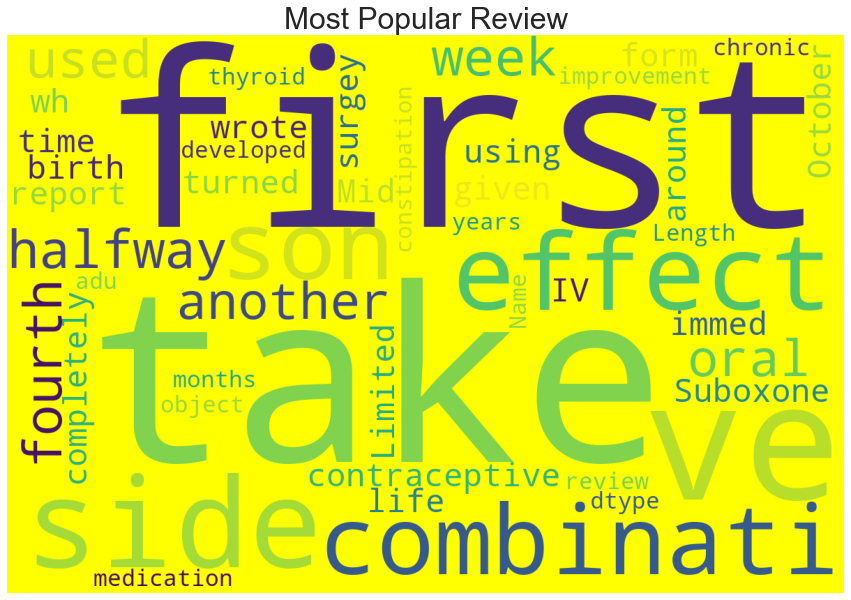

In [23]:
# let's see the words cloud for the reviews 

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'yellow', stopwords = stopwords, width = 1200, height = 800).generate(str(drugs['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Popular Review', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [24]:
drugs['rating'].value_counts()

10.0    50745
9.0     27379
1.0     21504
8.0     18791
7.0      9395
5.0      7959
2.0      6879
3.0      6465
6.0      6301
4.0      4980
Name: rating, dtype: int64

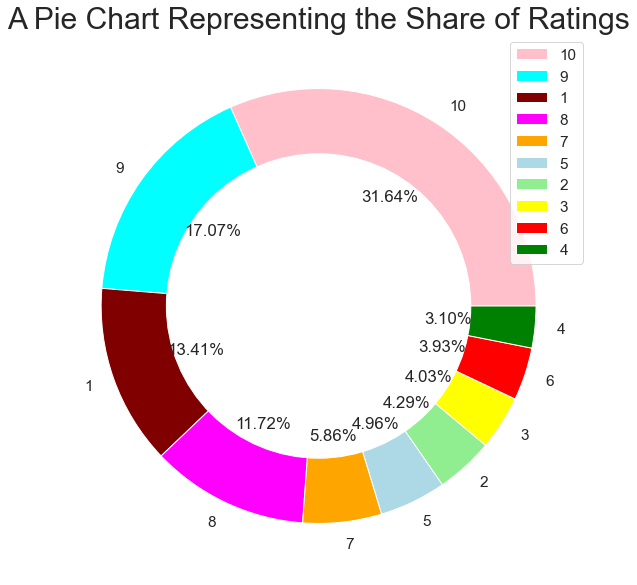

In [25]:
# making a donut chart to represent share of each ratings

size = [50745, 27379, 21504, 18791, 9395, 7959, 6879, 6465,6301 ,4980]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'lightblue', 'lightgreen', 'yellow', 'red','green']
labels = "10", "9", "1", "8", "7", "5", "2", "3","6","4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Share of Ratings', fontsize = 30)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

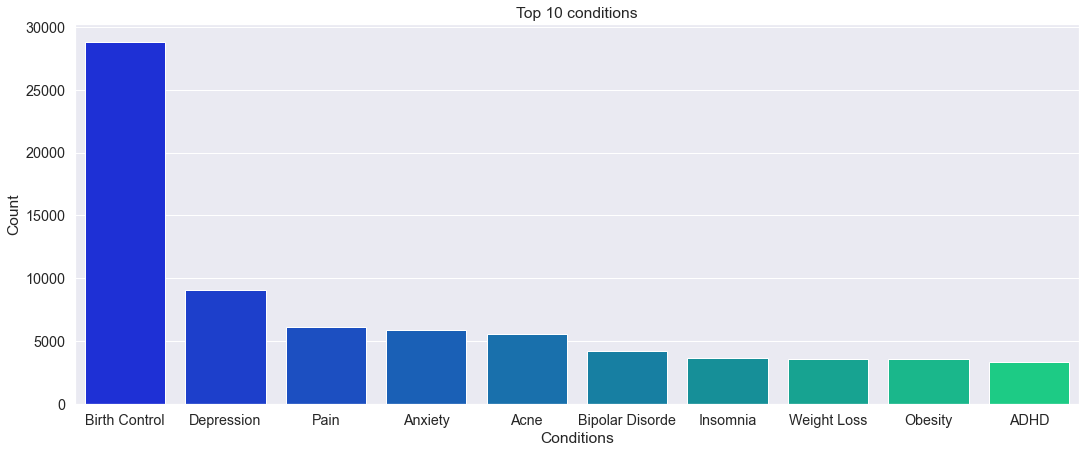

In [26]:
# This barplot show the top 10 conditions the people are suffering.
cond = dict(drugs['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

This barplot show  brith control is  top  condition that people are suffering.

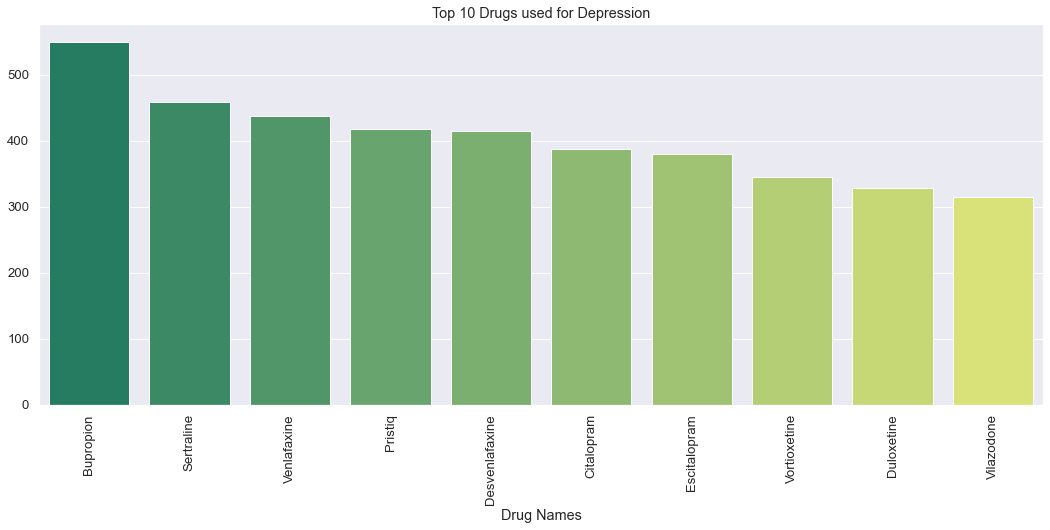

In [27]:
# Top 10 drugs which are used for the top condition, that is Depression

df = drugs[drugs['condition'] == 'Depression']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df.index, y = df.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Depression")
plt.setp(sns_.get_xticklabels(), rotation = 90);

Bupropion is topmost drug which used in depression condition with 540 times

In [28]:
# feature engineering 
# let's make a new column review sentiment 

drugs.loc[(drugs['rating'] >= 5), 'Review_Sentiment'] = 1
drugs.loc[(drugs['rating'] < 5), 'Review_Sentiment'] = 0

drugs['Review_Sentiment'].value_counts()

1.0    120570
0.0     39828
Name: Review_Sentiment, dtype: int64

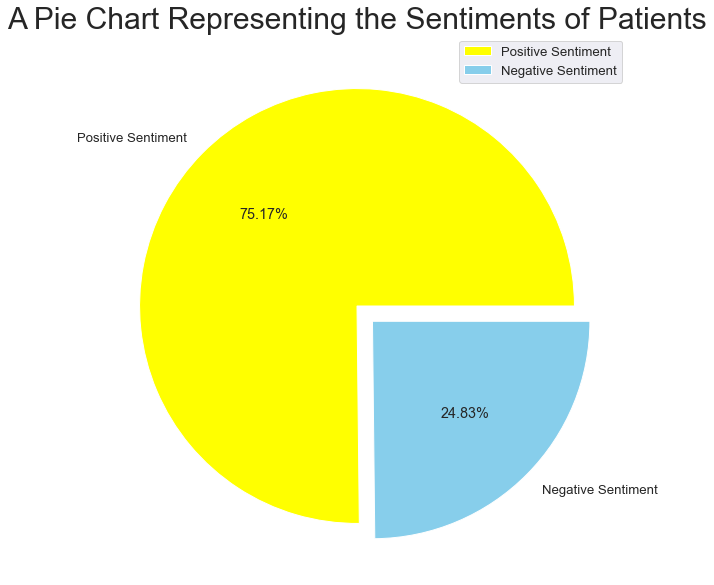

In [29]:
# a pie chart to represent the sentiments of the patients

size = [120570, 39828]
colors = ['yellow', 'skyblue']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Sentiments of Patients', fontsize = 30)
plt.legend()
plt.show()

From rating we get positive rating with 75.17%

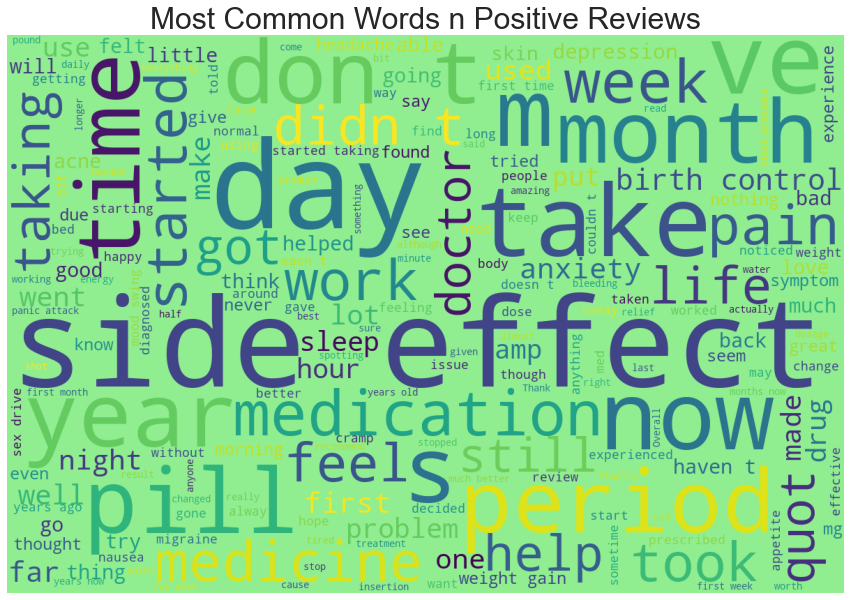

In [30]:
# making Words cloud for the postive sentiments

positive_sentiments = " ".join([text for text in drugs['review'][drugs['Review_Sentiment'] == 1]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'lightgreen', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Common Words n Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()
     


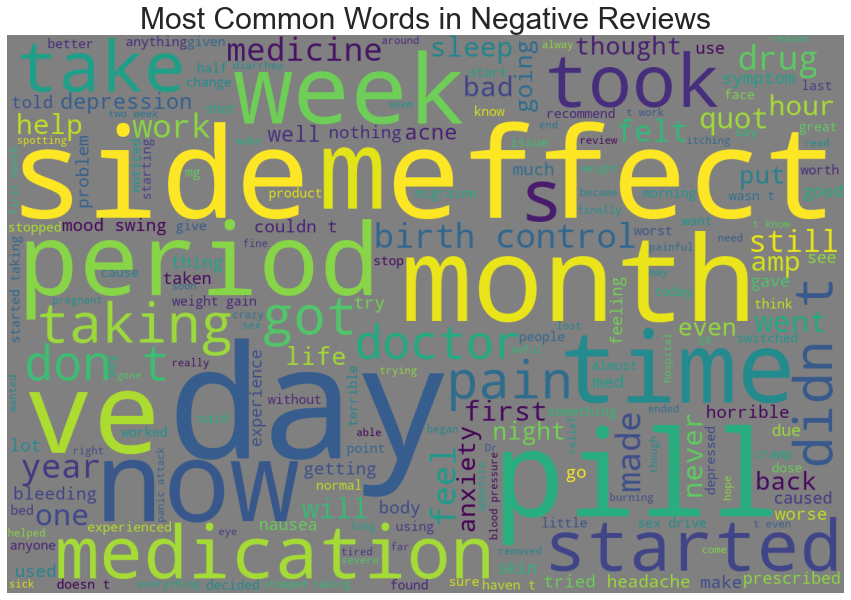

In [31]:
# making wordscloud for the Negative sentiments

negative_sentiments = " ".join([text for text in drugs['review'][drugs['Review_Sentiment'] == 0]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'grey', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Common Words in Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()
     

In [32]:
# converting the date into datetime format
drugs['date'] = pd.to_datetime(drugs['date'], errors = 'coerce')

# now extracting year from date
drugs['Year'] = drugs['date'].dt.year

# extracting the month from the date
drugs['month'] = drugs['date'].dt.month

# extracting the days from the date
drugs['day'] = drugs['date'].dt.day

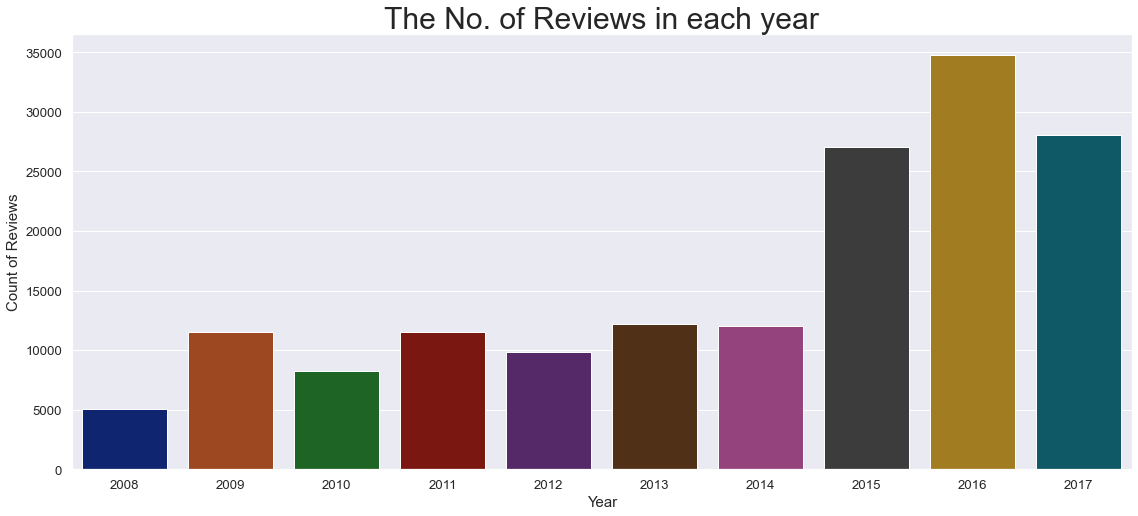

In [33]:
# looking at the no. of reviews in each of the year

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(drugs['Year'], palette ='dark')
plt.title('The No. of Reviews in each year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

2016 is highest year of rating with almost 35000 reviews.

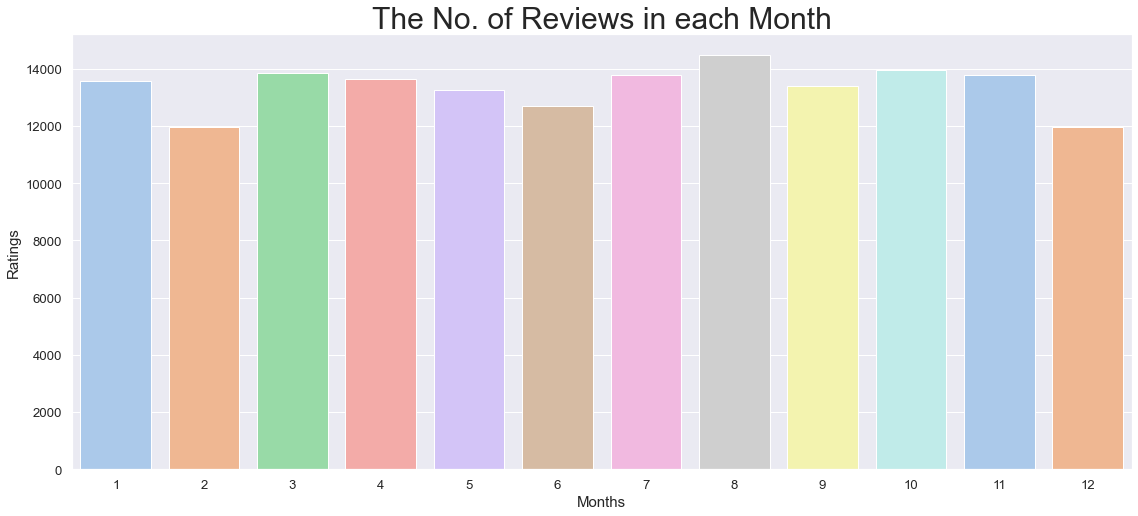

In [34]:
# looking at the no. of reviews in each of the months

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(drugs['month'], palette ='pastel')
plt.title('The No. of Reviews in each Month', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Ratings', fontsize = 15)
plt.show()

In Augest month gets grater than 14000 reviews.

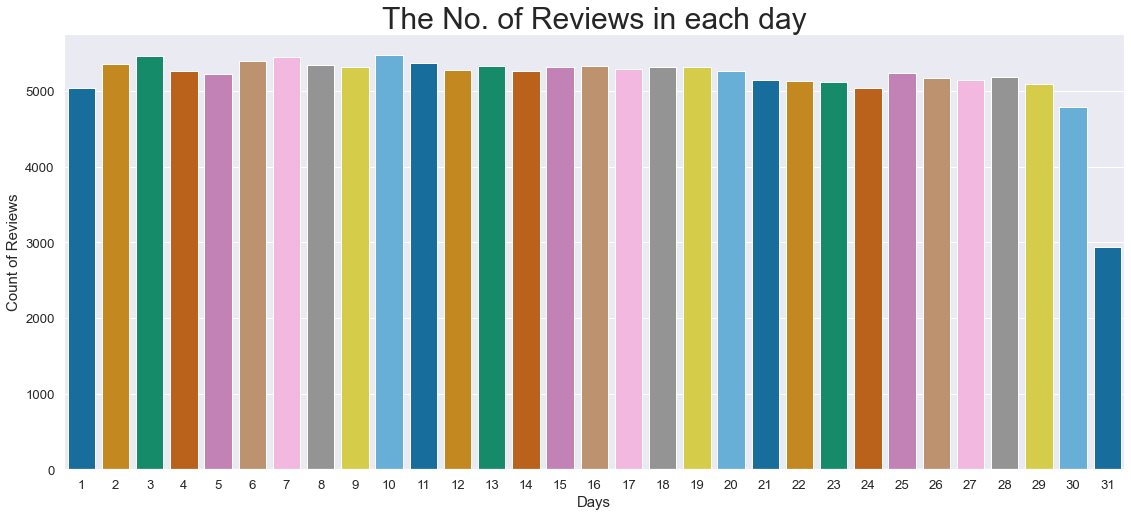

In [35]:
# looking at the no. of reviews in each of the day

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(drugs['day'], palette ='colorblind')
plt.title('The No. of Reviews in each day', fontsize = 30)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

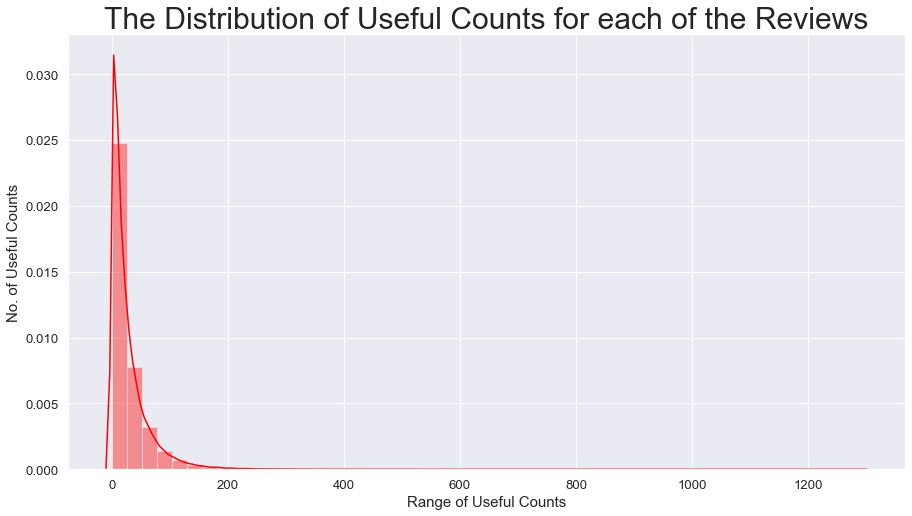

In [36]:

# plotting a dist plot

plt.rcParams['figure.figsize'] = (15, 8)
sns.distplot(drugs['usefulCount'], color = 'red')
plt.title('The Distribution of Useful Counts for each of the Reviews', fontsize = 30)
plt.xlabel('Range of Useful Counts', fontsize = 15)
plt.ylabel('No. of Useful Counts', fontsize = 15)
plt.show()

The distribution of useful counts for each review shows postive skewness.


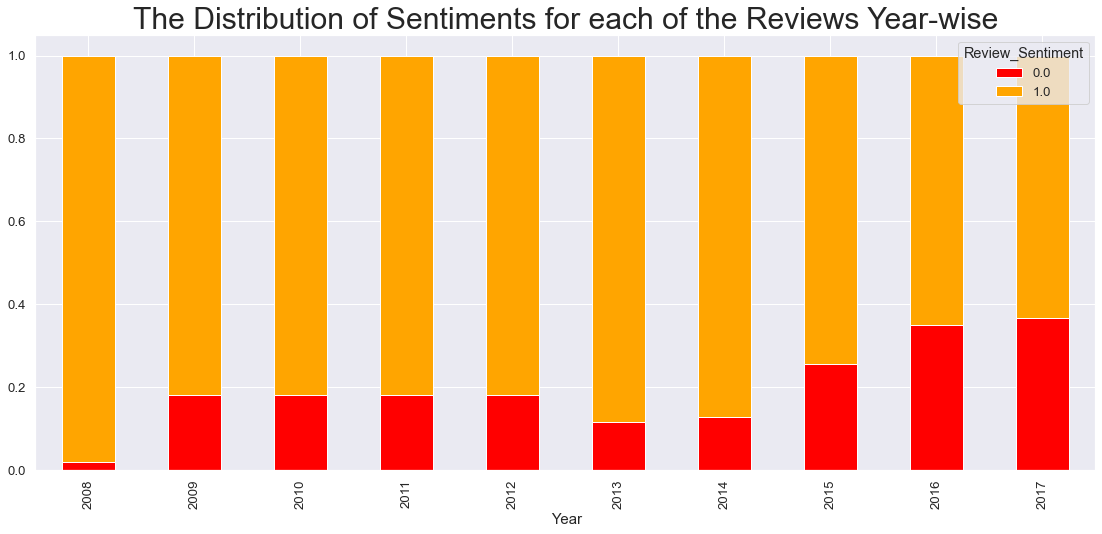

In [37]:
# plotting a stacked bar to see in which year what were the sentiments

df = pd.crosstab(drugs['Year'] ,drugs['Review_Sentiment'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (19, 8), color = ['red', 'orange', 'pink'])
plt.title('The Distribution of Sentiments for each of the Reviews Year-wise', fontsize = 30)
plt.xlabel(' Year', fontsize = 15)
plt.show()

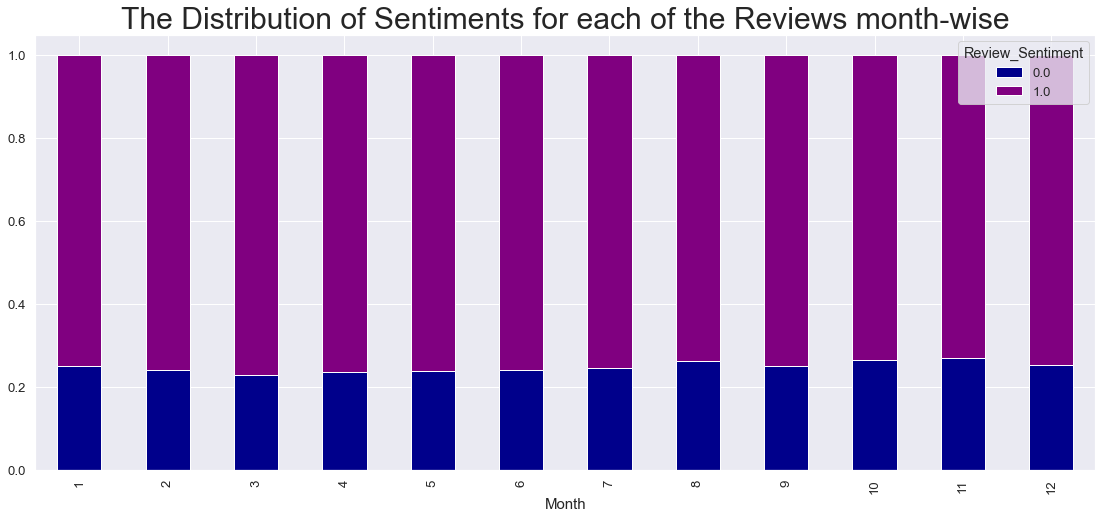

In [38]:
# plotting a stacked bar to see in which month what were the sentiments

df = pd.crosstab(drugs['month'] ,drugs['Review_Sentiment'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (19, 8), color = ['darkblue', 'purple', 'violet'])
plt.title('The Distribution of Sentiments for each of the Reviews month-wise', fontsize = 30)
plt.xlabel('Month', fontsize = 15)
plt.show()

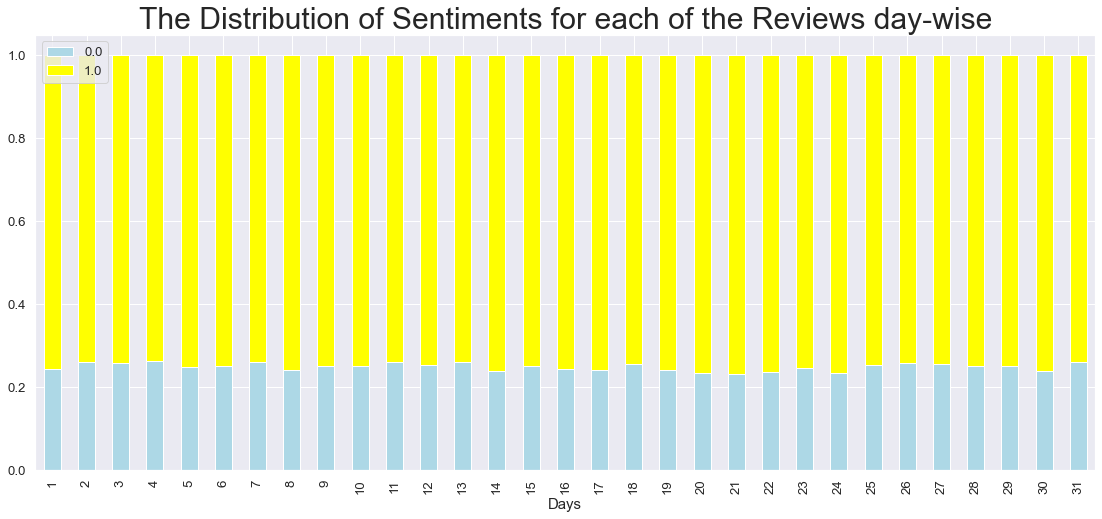

In [39]:
# plotting a stacked bar to see in which year what were the sentiments

df = pd.crosstab(drugs['day'] ,drugs['Review_Sentiment'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (19, 8), color = ['lightblue', 'yellow', 'lightgreen'])
plt.title('The Distribution of Sentiments for each of the Reviews day-wise', fontsize = 30)
plt.xlabel('Days', fontsize = 15)
plt.legend(loc = 2)
plt.show()
     


In [40]:
# importing the important libraries 

import re
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
     

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\balte\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:

stop = stopwords.words('english')

In [42]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
# removing some stopwords from the list of stopwords as they are important for drug recommendation

stops = set(stopwords.words('english'))

not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't",
            "mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stops.remove(i)

In [44]:
drugs['review'].head(10)

0    "It has no side effect, I take it in combinati...
1    "My son is halfway through his fourth week of ...
2    "I used to take another oral contraceptive, wh...
3    "This is my first time using any form of birth...
4    "Suboxone has completely turned my life around...
5    "2nd day on 5mg started to work with rock hard...
6    "He pulled out, but he cummed a bit in me. I t...
7    "Abilify changed my life. There is hope. I was...
8    " I Ve had  nothing but problems with the Kepp...
9    "I had been on the pill for many years. When m...
Name: review, dtype: object

In [45]:
drugs.columns

Index(['drugName', 'condition', 'review', 'rating', 'date', 'usefulCount',
       'Review_Sentiment', 'Year', 'month', 'day'],
      dtype='object')

In [46]:
df_condition = drugs.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
df_condition = pd.DataFrame(df_condition).reset_index()
df_condition.tail(20)
     

,condition,drugName
864,Gallbladder Disease,1
865,Muscle Twitching,1
866,Schilling Test,1
867,Gastric Cance,1
868,Mumps Prophylaxis,1
869,84</span> users found this comment helpful.,1
870,79</span> users found this comment helpful.,1
871,Short Stature for Age,1
872,Scleroderma,1
873,Multiple Endocrine Adenomas,1


In [47]:
stemmer = SnowballStemmer('english')

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))
     

In [48]:
%time drugs['review_clean'] = drugs['review'].apply(review_to_words)

CPU times: total: 1min 16s
Wall time: 1min 20s


In [49]:
drugs.columns

Index(['drugName', 'condition', 'review', 'rating', 'date', 'usefulCount',
       'Review_Sentiment', 'Year', 'month', 'day', 'review_clean'],
      dtype='object')

In [50]:
#Top Rated Drugs For a Condition

def top_rated_drug_for_condition(condition='Depression', return_n=10):
    rating, count = [], []
    top_drugs = drugs[drugs.condition == condition].drugName.value_counts().head(return_n).keys()
    for i in top_drugs:
        rating.append(round(drugs[drugs.drugName==i].rating.mean(), 2))
        count.append(sum(drugs.drugName==i))
    return pd.DataFrame(np.array([top_drugs, rating, count]).T, columns=['Name','Rating','Count']).sort_values('Rating', ascending=False)

In [51]:
top_rated_drug_for_condition('Birth Control')

,Name,Rating,Count
3,Levonorgestrel,7.4,3631
8,Skyla,7.25,824
7,Mirena,6.59,1242
6,Implanon,6.08,1102
9,Lo Loestrin Fe,6.04,680
5,Ethinyl estradiol / norgestimate,5.84,2033
0,Etonogestrel,5.81,3321
4,Ethinyl estradiol / levonorgestrel,5.8,1809
2,Nexplanon,5.67,2156
1,Ethinyl estradiol / norethindrone,5.59,2750


In [52]:
top_rated_drug_for_condition('Depression')

,Name,Rating,Count
6,Escitalopram,7.85,1287
5,Citalopram,7.67,994
1,Sertraline,7.49,1353
0,Bupropion,7.44,1017
4,Desvenlafaxine,7.27,580
3,Pristiq,7.22,548
2,Venlafaxine,6.79,1012
8,Duloxetine,6.64,931
9,Vilazodone,6.18,417
7,Vortioxetine,6.08,506


In [133]:
drugs

,drugName,condition,rating
0,Valsartan,Left Ventricular Dysfunction,9.0
1,Guanfacine,ADHD,8.0
2,Lybrel,Birth Control,5.0
3,Ortho Evra,Birth Control,8.0
4,Buprenorphine / naloxone,Opiate Dependence,9.0
...,...,...,...
161292,Campral,Alcohol Dependence,10.0
161293,Metoclopramide,Nausea/Vomiting,1.0
161294,Orencia,Rheumatoid Arthritis,2.0
161295,Thyroid desiccated,Underactive Thyroid,10.0
